In [13]:
import pandas as pd

df = pd.read_csv('../data/sales.csv')
df.dropna(subset=['price'], inplace=True)  

In [14]:
df['year'] = pd.to_datetime(df.purchase_date).dt.year
train_raw = df[df.year < 2015].reset_index(drop=True)
test_raw = df[df.year >= 2015].reset_index(drop=True)

# 1. Data Transformation

<font color='red'>Assignment:</font> Build a DataFrame named **train** which contains numerical values of **price** and **cost** in **train_raw**.

In [19]:
price_train_raw = train_raw.price.map(lambda x: float(x.strip('$').replace(',', '')))
cost_train_raw = train_raw.cost.map(lambda x: x if type(x) == float else float(x.strip('$').strip('k'))*1000)
train = pd.concat({'price': price_train_raw, 'cost': cost_train_raw}, axis = 1)
train.head()

,price,cost
0,300492.0,333000.0
1,430570.0,NaN
2,213070.0,270000.0
3,122659.0,97000.0
4,60320.0,59000.0


**Example:** Generate features and target. This is not the only method, but it is highly recommended.

In [20]:
features = list(train.columns)
target = "price"
features.remove(target)

X_train = train[features]
y_train = train[target]

**Example:** Imputing missing values in **X_train** using the column means.

In [21]:
X_train = X_train.fillna(X_train.mean())

In [24]:
X_train.head()

,cost
0,333000.000000
1,166184.183143
2,270000.000000
3,97000.000000
4,59000.000000


<font color='red'>Assignment:</font> Get **X_test** and **y_test**, and impute missing values in **X_test** with means of **X_train**.  

In [25]:
price_test_raw = test_raw.price.map(lambda x: float(x.strip('$').replace(',', '')))
cost_test_raw = test_raw.cost.map(lambda x: x if type(x) == float else float(x.strip('$').strip('k'))*1000)
test = pd.concat({'price': price_test_raw, 'cost': cost_test_raw}, axis = 1)
test.head()

,price,cost
0,229174.0,NaN
1,168762.0,160000.0
2,605022.0,160000.0
3,4444.0,NaN
4,17932.0,18000.0


In [26]:
features = list(test.columns)
target = "price"
features.remove(target)

X_test = test[features]
y_test = test[target]

In [27]:
X_test = X_test.fillna(X_train.mean())
X_test.head()

,cost
0,166184.183143
1,160000.000000
2,160000.000000
3,166184.183143
4,18000.000000


<font color='red'>Question:</font> Why do we use means of **X_train** rather than those of **X_test**?

In [ ]:
#not quite sure, maybe use means of X_train will prevent extra errors into the loss function? 

# 2. Linear Model

In [28]:
from sklearn.linear_model import LinearRegression

**Example:** Initialize model

In [29]:
model = LinearRegression()

**Example:** Fit model

In [30]:
model.fit(X_train, y_train)

LinearRegression()

**Example:** Get prediction

In [31]:
y_train_pred = model.predict(X_train)

<font color='red'>Assignment:</font> Calculate **train loss**: **MAE**, **MSE**, and **R2 score**.

In [32]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [33]:
print('train MAE: {0:.2e}'.format(mean_absolute_error(y_train, y_train_pred)))
print('train MSE: {0:.2e}'.format(mean_squared_error(y_train, y_train_pred)))
print('train R2: {0:.3f}'.format(r2_score(y_train, y_train_pred)))

train MAE: 1.15e+05
train MSE: 2.96e+10
train R2: 0.306


<font color='red'>Assignment:</font> Visualize the difference between prediction and ground truth.

Text(0, 0.5, 'y_train_pred')

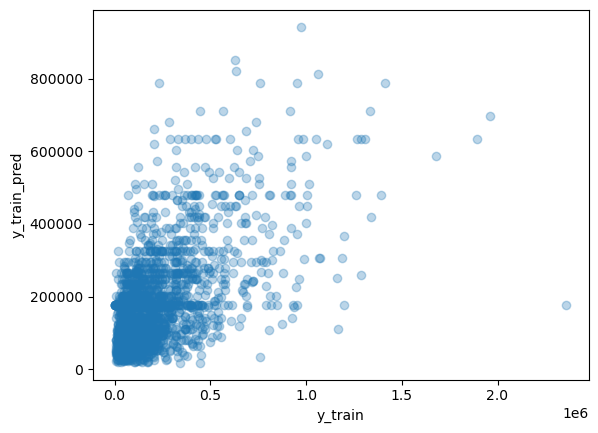

In [35]:
import matplotlib.pylab as plt
%matplotlib inline

plt.scatter(y_train, y_train_pred, alpha=0.3)
plt.xlabel('y_train')
plt.ylabel('y_train_pred')

<font color='red'>Question:</font> What are the coefficient and intercept for this model?

In [38]:
model.coef_

array([0.98206553])

In [39]:
model.intercept_

14657.539917452552

**Example:** Visualize the relationship between **price** and **cost**.

In [40]:
import numpy as np

def plot_cost_price(cost, price, model):
    plt.scatter(cost, price, alpha=0.3)
    x = np.linspace(0, 1e6)
    y = model.predict(x.reshape(-1,1))
    plt.plot(x, y, color='r')
    plt.xlabel('cost')
    plt.ylabel('price')
    plt.xlim([0,1e6])
    plt.ylim([0,2e6])
    plt.show()

C:\Users\liyuh\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


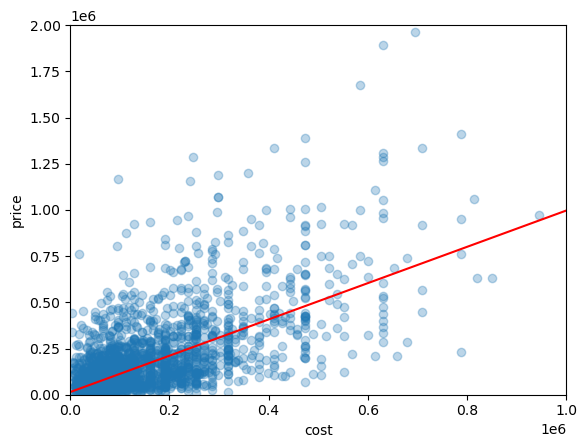

In [41]:
plot_cost_price(train.cost, train.price, model)

<font color='red'>Assignment:</font> Calculate the **test loss**; visualize the comparision between prediction and ground truth and the relationship between **cost** and **price** with **test data**.

In [42]:
y_test_pred = model.predict(X_test)

In [43]:
print('test MAE: {0:.2e}'.format(mean_absolute_error(y_test, y_test_pred)))
print('test MSE: {0:.2e}'.format(mean_squared_error(y_test, y_test_pred)))
print('test R2: {0:.3f}'.format(r2_score(y_test, y_test_pred)))

test MAE: 1.44e+05
test MSE: 5.62e+10
test R2: 0.348


Text(0, 0.5, 'y_test_pred')

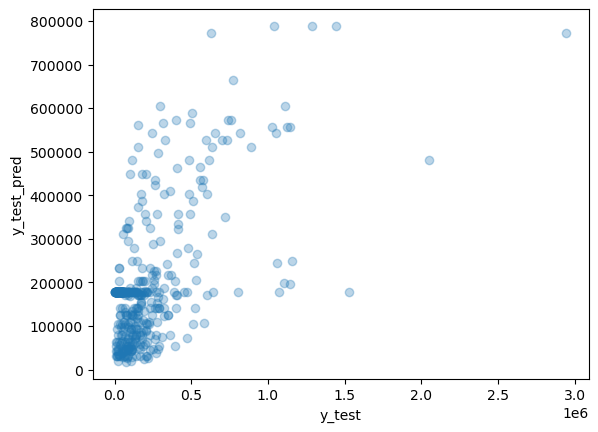

In [44]:
plt.scatter(y_test, y_test_pred, alpha=0.3)
plt.xlabel('y_test')
plt.ylabel('y_test_pred')

C:\Users\liyuh\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


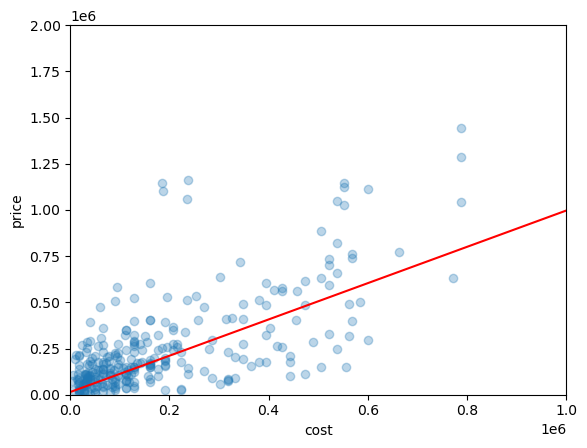

In [45]:
plot_cost_price(test.cost, test.price, model)

# 3. Polynomial Model

## 3.1 Polynomial Features

**Example:** Generate polynomial features.

In [46]:
from sklearn.preprocessing import PolynomialFeatures

In [47]:
pf = PolynomialFeatures(degree=3)

In [48]:
pf.fit_transform(X_train)

array([[1.00000000e+00, 3.33000000e+05, 1.10889000e+11, 3.69260370e+16],
       [1.00000000e+00, 1.66184183e+05, 2.76171827e+10, 4.58953895e+15],
       [1.00000000e+00, 2.70000000e+05, 7.29000000e+10, 1.96830000e+16],
       ...,
       [1.00000000e+00, 1.66184183e+05, 2.76171827e+10, 4.58953895e+15],
       [1.00000000e+00, 4.40000000e+04, 1.93600000e+09, 8.51840000e+13],
       [1.00000000e+00, 1.28000000e+05, 1.63840000e+10, 2.09715200e+15]])

In [49]:
pf.get_feature_names()

C:\Users\liyuh\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['1', 'x0', 'x0^2', 'x0^3']

In [50]:
pd.DataFrame(pf.transform(X_train), 
             columns=pf.get_feature_names()).head()

C:\Users\liyuh\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,1,x0,x0^2,x0^3
0,1.0,333000.000000,1.108890e+11,3.692604e+16
1,1.0,166184.183143,2.761718e+10,4.589539e+15
2,1.0,270000.000000,7.290000e+10,1.968300e+16
3,1.0,97000.000000,9.409000e+09,9.126730e+14
4,1.0,59000.000000,3.481000e+09,2.053790e+14


<font color='red'>Question:</font> What is each column in above dataframe?

In [51]:
#first column is 1s, second column is the cost, third column is the squred of cost, last column is the cube of cost

## 3.2 Pipeline

**Example:** Use **pipeline** to wrap up polynomial features and model.

In [52]:
from sklearn.pipeline import Pipeline

In [53]:
steps = [('poly', PolynomialFeatures(degree=2)),
         ('lr', LinearRegression())]
model = Pipeline(steps)

**Example:** use pipeline as model.

In [54]:
model.fit(X_train, y_train)

Pipeline(steps=[('poly', PolynomialFeatures()), ('lr', LinearRegression())])

In [55]:
y_train_pred = model.predict(X_train)

<font color='red'>Assignment:</font> Calculate regression metrics; visualize train and test lost; visualize relationship between **cost** and **price**.

In [56]:
print('train MAE: {0:.2e}'.format(mean_absolute_error(y_train, y_train_pred)))
print('train MSE: {0:.2e}'.format(mean_squared_error(y_train, y_train_pred)))
print('train R2: {0:.3f}'.format(r2_score(y_train, y_train_pred)))

train MAE: 1.11e+05
train MSE: 2.88e+10
train R2: 0.323


Text(0, 0.5, 'y_train_pred')

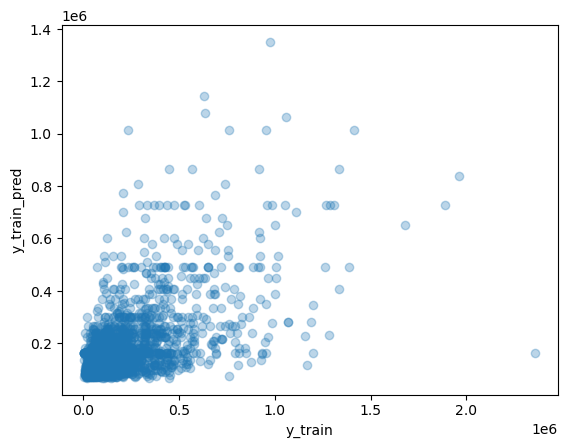

In [57]:
plt.scatter(y_train, y_train_pred, alpha=0.3)
plt.xlabel('y_train')
plt.ylabel('y_train_pred')

C:\Users\liyuh\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


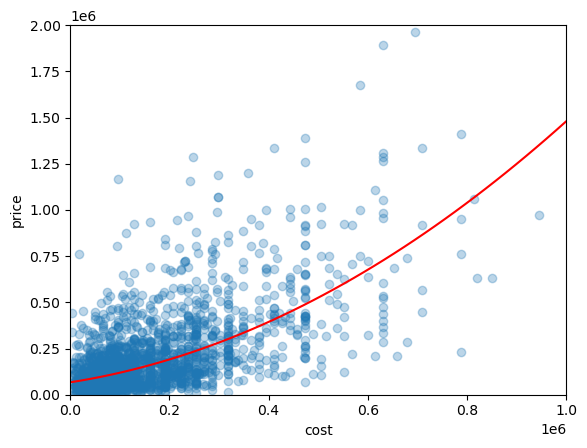

In [58]:
plot_cost_price(train.cost, train.price, model)

In [59]:
y_test_pred = model.predict(X_test)

In [60]:
print('test MAE: {0:.2e}'.format(mean_absolute_error(y_test, y_test_pred)))
print('test MSE: {0:.2e}'.format(mean_squared_error(y_test, y_test_pred)))
print('test R2: {0:.3f}'.format(r2_score(y_test, y_test_pred)))

test MAE: 1.36e+05
test MSE: 5.20e+10
test R2: 0.397


Text(0, 0.5, 'y_test_pred')

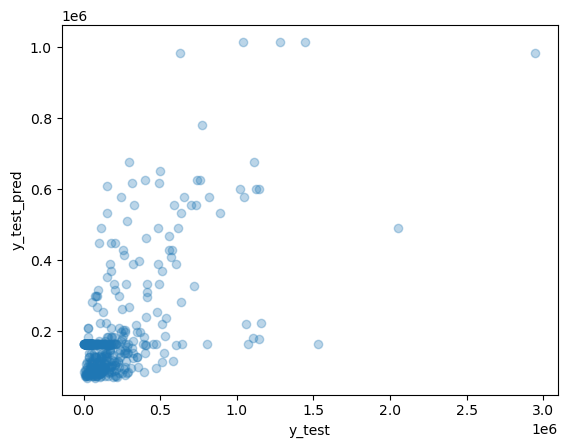

In [61]:
plt.scatter(y_test, y_test_pred, alpha=0.3)
plt.xlabel('y_test')
plt.ylabel('y_test_pred')

C:\Users\liyuh\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


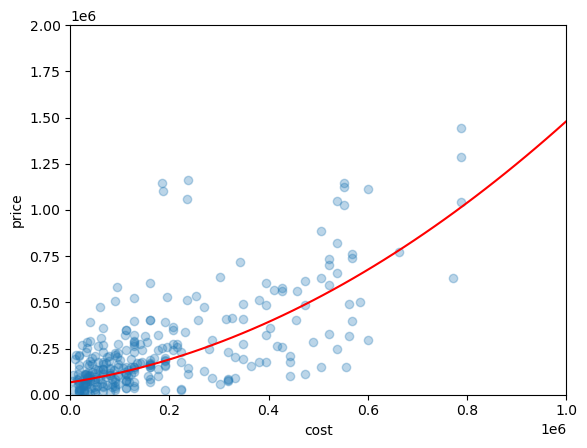

In [62]:
plot_cost_price(test.cost, test.price, model)

<font color='red'>Question:</font> Does the model with polynomial features perform better? Why?

In [ ]:
#Yes, as indicated by value of the metrics
#This is because the added x^2 captures some nonlinear feactures of the cost-price relationship

**Example:** Extract the linear model from pipeline

In [63]:
lr = model.steps[1][1]

**Example:** Extract the coefficents

In [64]:
lr.coef_

array([0.00000000e+00, 4.20267056e-01, 9.92477321e-07])

<font color='red'>Question:</font> Why is the coefficient for x^2 so small?

In [ ]:
#because the cost-price is very close to linear, and the price is of magnitude of 1e5 ~ 1e6, 
#x^2 is very big so the coeficient of x^2 is very small

## 3.3 Rescaling

In [65]:
from sklearn.preprocessing import MinMaxScaler

In [66]:
steps = [('poly', PolynomialFeatures(degree=2)),
         ('Rescale', MinMaxScaler()),
         ('lr', LinearRegression())]
model = Pipeline(steps)

In [67]:
model.fit(X_train, y_train)

Pipeline(steps=[('poly', PolynomialFeatures()), ('Rescale', MinMaxScaler()),
                ('lr', LinearRegression())])

In [68]:
model.steps[2][1].coef_

array([     0.        , 395891.5670774 , 886298.12766067])

<font color='red'>Question:</font> What does **MinMaxScaler** do? Why do we need it?

In [ ]:
# MinMaxScaler scales all the data into the range of [0 1] (by default) before fitting
# After rescaling, the value of coefficient for x^2 is in the same magnitude to that for x^1
# It helps preventing over-fitting 

## 3.4 High degree polynomial terms

<font color='red'>Assignment:</font> Repeat the steps in **4.2** with higher **degree** values in **PolynomialFeatures**.

train MAE: 1.10e+05
train MSE: 2.82e+10
train R2: 0.337


C:\Users\liyuh\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


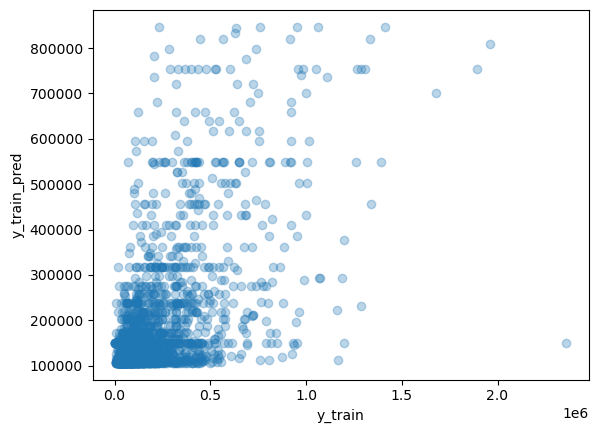

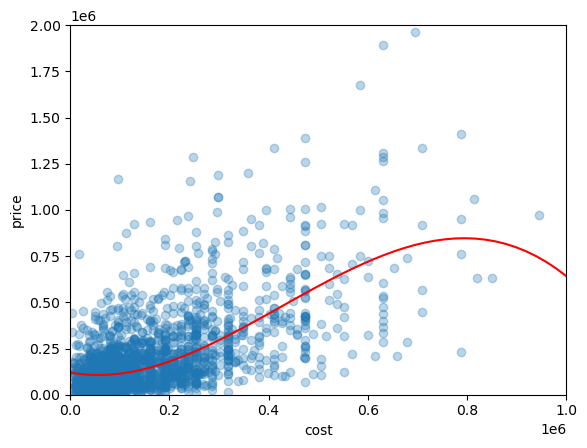

test MAE: 1.35e+05
test MSE: 5.35e+10
test R2: 0.379


C:\Users\liyuh\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


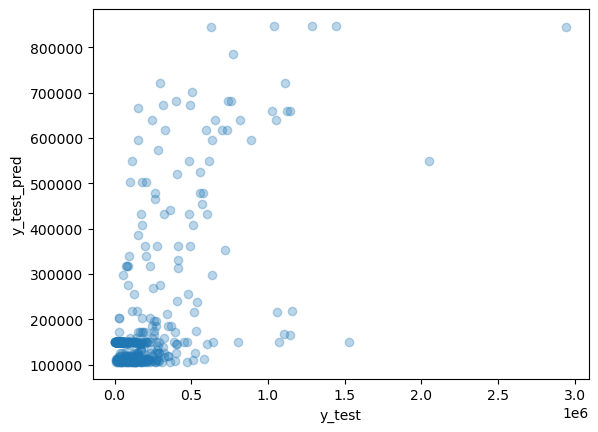

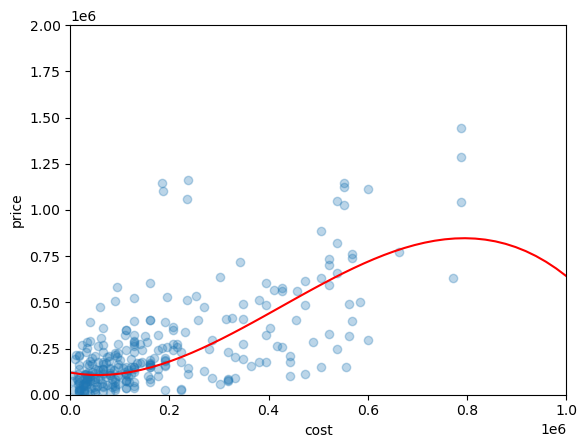

In [71]:
model_degree = 3
steps = [('poly', PolynomialFeatures(degree=model_degree)),
         ('lr', LinearRegression())]
model = Pipeline(steps)

model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)

print('train MAE: {0:.2e}'.format(mean_absolute_error(y_train, y_train_pred)))
print('train MSE: {0:.2e}'.format(mean_squared_error(y_train, y_train_pred)))
print('train R2: {0:.3f}'.format(r2_score(y_train, y_train_pred)))

plt.scatter(y_train, y_train_pred, alpha=0.3)
plt.xlabel('y_train')
plt.ylabel('y_train_pred')

plt.figure()
plot_cost_price(train.cost, train.price, model)

y_test_pred = model.predict(X_test)

print('test MAE: {0:.2e}'.format(mean_absolute_error(y_test, y_test_pred)))
print('test MSE: {0:.2e}'.format(mean_squared_error(y_test, y_test_pred)))
print('test R2: {0:.3f}'.format(r2_score(y_test, y_test_pred)))

plt.scatter(y_test, y_test_pred, alpha=0.3)
plt.xlabel('y_test')
plt.ylabel('y_test_pred')

plt.figure()
plot_cost_price(test.cost, test.price, model)

<font color='red'>Assignment:</font> Visualize the change of train loss and test loss with polynomial degree value, respectively. Use **MAE**.

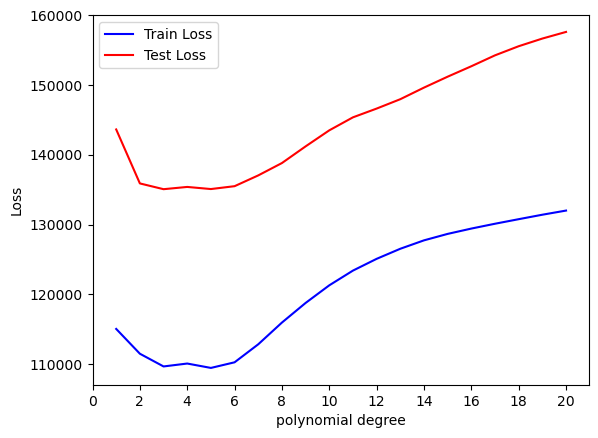

In [76]:
max_test_degree = 20

MAE_train = pd.Series([0] * max_test_degree)
MAE_test = pd.Series([0] * max_test_degree)

for model_degree in range(1, max_test_degree+1):
    steps = [('poly', PolynomialFeatures(degree=model_degree)),
         ('lr', LinearRegression())]
    model = Pipeline(steps)

    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    MAE_train[model_degree-1] = mean_absolute_error(y_train, y_train_pred)
    
    y_test_pred = model.predict(X_test)
    MAE_test[model_degree-1] = mean_absolute_error(y_test, y_test_pred)

plt.figure()
plt.plot(range(1, max_test_degree+1), MAE_train, color='b')
plt.plot(range(1, max_test_degree+1), MAE_test, color='r')
plt.legend(['Train Loss','Test Loss'])
plt.xticks(range(0,22,2))
plt.xlabel('polynomial degree')
plt.ylabel('Loss')
plt.show()

<font color='red'>Question:</font> Can we keep improving model with much higher degree polynomial terms?

In [ ]:
# No improvement after degree = 3, get wose after degree = 6

<font color='red'>Question:</font> What is model complexity?

In [77]:
#model complexxity is the number of independent variables a model need to take into account 
# in order to make accurate predictions

<font color='red'>Question:</font> What are overfitting and underfitting? Any examples of overfitting and underfitting above? How do you tell a model is overfit or underfit?

In [ ]:
# Overfitting refers models that correpond too close a particular set of data, and may therefore
# fail to fit addition data
#
# Underfittig refers models that cannot adequately capture the underlying structure of data.
#
#In above example, polynomial functions with degree > 6 are underfitting.
#
# A model is overfit if the train loss indicates a near perfct fit while the test loss indicates otherwise
# A model is underfit if the train loss indicates a bad fit

<font color='red'>Question:</font> What is bias and variance? How do they relate to overfitting and underfitting?

In [ ]:
# Bias is erroneous assumptions in learning algorithm. 
# High bias cause the algorithm fail to capture the structure of the data, which is underfit
#
# Variance is error from sensitivity to noise of the training data set
# High variance cause algorithm modeling random noise of the training data, which causes overfit.

<font color='red'>Question:</font> What is bias-variance tradeoff?

In [ ]:
# Bias-variance tradeoff is a property of model. It states that the variance of the parameter estimated from samples could be
# reduced by increasing the bias of the estimated parameters.

<font color='red'>Assignment:</font> Search for approaches for preventing overfitting?

In [ ]:
#1. Training with more and noise-free data
#2. Data augmentation, like simple transformation, or adding of noise in the input data; to make the data more diverse
#3. Reduce the complexity of the model, includes feactures that most likely to capture the data sturcture
#4. Cross-vadilation (like k-fold)
#5. Regulation, to discourage large coefficients
#6. Ensembling multiple models
#7  Early stopping (for those need repeating trainnings)